In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Nadam
import math
import matplotlib.pyplot as plt

D:\installed\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def readDataset(filename):
    text_file = open(filename, 'r')
    dataset = []   
    for line in text_file:  
        line = line.split(',')      
        dt = [ float(x) for x in line ]
        dataset.append(dt)    
    text_file.close()
    dataset = np.array(dataset)
    return dataset
def tagData(data,perc):
    sz = math.ceil(data.shape[0]*perc/100)
    dat = np.zeros((data.shape[0],data.shape[1]*2))
    dat[:data.shape[0],:data.shape[1]] =data  #append column for labels
    dat[:data.shape[0]-1,data.shape[1]:] =data[1:,:]  #append column for labels   
    candletrain = dat[:sz,:4]    
    
    yopentrain = dat[:sz,4]
    yclosetrain = dat[:sz,7]
    yhightrain = dat[:sz,5]
    ylowtrain = dat[:sz,6]
    
    
    candletest = dat[sz-1:,:4]         
    
    yopentest = dat[sz-1:,4]
    yclosetest = dat[sz-1:,7]
    yhightest = dat[sz-1:,5]
    ylowtest = dat[sz-1:,6]
    
    candletrain = candletrain.reshape((candletrain.shape[0], 1, candletrain.shape[1]))
    candletest = candletest.reshape((candletest.shape[0], 1, candletest.shape[1]))
    
    return candletrain,yopentrain,yclosetrain,yhightrain,ylowtrain,candletest,yopentest,yhightest,ylowtest,yclosetest

In [3]:
epoch = 150
percentage = 60

In [4]:

file = 'EURUSDmicro_ H4_CandleData.txt'
data = readDataset(file)

candletrain,yopentrain,yclosetrain,yhightrain,ylowtrain,candletest,yopentest,yhightest,ylowtest,yclosetest = tagData(data,percentage)
print('training samples: ',candletrain.shape)
print('testing samples: ',candletest.shape)

training samples:  (6047, 1, 4)
testing samples:  (4031, 1, 4)


In [5]:
openm = Sequential()
openm.add(LSTM(200, input_shape=(candletrain.shape[1], candletrain.shape[2])))
openm.add(Dense(1))



closem = Sequential()
closem.add(LSTM(200, input_shape=(candletrain.shape[1], candletrain.shape[2])))
closem.add(Dense(1))


highm = Sequential()
highm.add(LSTM(200, input_shape=(candletrain.shape[1], candletrain.shape[2])))
highm.add(Dense(1))



lowm = Sequential()
lowm.add(LSTM(200, input_shape=(candletrain.shape[1], candletrain.shape[2])))
lowm.add(Dense(1))



In [6]:
opt = Nadam(lr=0.00001, beta_1=0.09, beta_2=0.0999, epsilon=None, schedule_decay=0.0004)

print('###############################----Training Open----##############################')
openm.compile(loss='mean_squared_error', optimizer=opt)#'Nadam'
open_history = openm.fit(candletrain, yopentrain, epochs=epoch, batch_size=72, validation_data=(candletest, yopentest), verbose=1, shuffle=True)



print('###############################----Training Close----##############################')
closem.compile(loss='mean_squared_error', optimizer=opt)#'Nadam'
close_history = closem.fit(candletrain, yclosetrain, epochs=epoch, batch_size=72, validation_data=(candletest, yclosetest), verbose=1, shuffle=True)

print('###############################----Training High----##############################')
highm.compile(loss='mean_squared_error', optimizer=opt)#'Nadam'
high_history = highm.fit(candletrain, yhightrain, epochs=epoch, batch_size=72, validation_data=(candletest, yhightest), verbose=1, shuffle=True)

print('###############################----Training Low----##############################')
lowm.compile(loss='mean_squared_error', optimizer=opt)#'Nadam'
low_history = lowm.fit(candletrain, ylowtrain, epochs=epoch, batch_size=72, validation_data=(candletest, ylowtest), verbose=1, shuffle=True)

###############################----Training Open----##############################
Train on 6047 samples, validate on 4031 samples
Epoch 1/150
6047/6047 [==============================] - 3s 522us/step - loss: 1.6375 - val_loss: 1.3184
Epoch 2/150
6047/6047 [==============================] - 1s 212us/step - loss: 1.5653 - val_loss: 1.2588
Epoch 3/150
6047/6047 [==============================] - 1s 219us/step - loss: 1.4948 - val_loss: 1.2006
Epoch 4/150
6047/6047 [==============================] - 1s 218us/step - loss: 1.4257 - val_loss: 1.1437
Epoch 5/150
6047/6047 [==============================] - 1s 201us/step - loss: 1.3582 - val_loss: 1.0879
Epoch 6/150
6047/6047 [==============================] - 1s 220us/step - loss: 1.2921 - val_loss: 1.0334
Epoch 7/150
6047/6047 [==============================] - 1s 229us/step - loss: 1.2274 - val_loss: 0.9801
Epoch 8/150
6047/6047 [==============================] - 1s 215us/step - loss: 1.1641 - val_loss: 0.9279
Epoch 9/150
6047/6047 [======

6047/6047 [==============================] - 1s 210us/step - loss: 5.5481e-06 - val_loss: 3.5026e-04
Epoch 75/150
6047/6047 [==============================] - 1s 210us/step - loss: 4.9315e-06 - val_loss: 3.4784e-04
Epoch 76/150
6047/6047 [==============================] - 1s 212us/step - loss: 4.3733e-06 - val_loss: 3.4748e-04
Epoch 77/150
6047/6047 [==============================] - 1s 206us/step - loss: 4.0041e-06 - val_loss: 3.4716e-04
Epoch 78/150
6047/6047 [==============================] - 1s 203us/step - loss: 3.7054e-06 - val_loss: 3.4784e-04
Epoch 79/150
6047/6047 [==============================] - 1s 202us/step - loss: 3.3157e-06 - val_loss: 3.4588e-04
Epoch 80/150
6047/6047 [==============================] - 1s 205us/step - loss: 3.0601e-06 - val_loss: 3.4595e-04
Epoch 81/150
6047/6047 [==============================] - 1s 202us/step - loss: 2.8742e-06 - val_loss: 3.4627e-04
Epoch 82/150
6047/6047 [==============================] - 1s 207us/step - loss: 2.7298e-06 - val_loss

6047/6047 [==============================] - 1s 220us/step - loss: 2.2426e-06 - val_loss: 3.4384e-04
Epoch 146/150
6047/6047 [==============================] - 1s 224us/step - loss: 2.2430e-06 - val_loss: 3.4362e-04
Epoch 147/150
6047/6047 [==============================] - 1s 209us/step - loss: 2.2290e-06 - val_loss: 3.4381e-04
Epoch 148/150
6047/6047 [==============================] - 1s 216us/step - loss: 2.2326e-06 - val_loss: 3.4364e-04
Epoch 149/150
6047/6047 [==============================] - 1s 213us/step - loss: 2.2447e-06 - val_loss: 3.4363e-04
Epoch 150/150
6047/6047 [==============================] - 1s 211us/step - loss: 2.2422e-06 - val_loss: 3.4382e-04
###############################----Training Close----##############################
Train on 6047 samples, validate on 4031 samples
Epoch 1/150
6047/6047 [==============================] - 3s 490us/step - loss: 1.4914 - val_loss: 1.1997
Epoch 2/150
6047/6047 [==============================] - 2s 250us/step - loss: 1.4225 -

Epoch 68/150
6047/6047 [==============================] - 1s 247us/step - loss: 1.7847e-05 - val_loss: 3.6414e-04
Epoch 69/150
6047/6047 [==============================] - 2s 264us/step - loss: 1.6569e-05 - val_loss: 3.6374e-04
Epoch 70/150
6047/6047 [==============================] - 2s 255us/step - loss: 1.5447e-05 - val_loss: 3.5869e-04
Epoch 71/150
6047/6047 [==============================] - 2s 259us/step - loss: 1.4516e-05 - val_loss: 3.5654e-04
Epoch 72/150
6047/6047 [==============================] - 2s 248us/step - loss: 1.3807e-05 - val_loss: 3.5738e-04
Epoch 73/150
6047/6047 [==============================] - 2s 251us/step - loss: 1.3053e-05 - val_loss: 3.5822e-04
Epoch 74/150
6047/6047 [==============================] - 1s 246us/step - loss: 1.2344e-05 - val_loss: 3.5359e-04
Epoch 75/150
6047/6047 [==============================] - 1s 246us/step - loss: 1.1851e-05 - val_loss: 3.5208e-04
Epoch 76/150
6047/6047 [==============================] - 1s 244us/step - loss: 1.1393e-

6047/6047 [==============================] - 1s 231us/step - loss: 9.1924e-06 - val_loss: 3.4860e-04
Epoch 140/150
6047/6047 [==============================] - 1s 244us/step - loss: 9.2062e-06 - val_loss: 3.4866e-04
Epoch 141/150
6047/6047 [==============================] - 1s 248us/step - loss: 9.1754e-06 - val_loss: 3.4865e-04
Epoch 142/150
6047/6047 [==============================] - 2s 252us/step - loss: 9.1892e-06 - val_loss: 3.4867e-04
Epoch 143/150
6047/6047 [==============================] - 1s 248us/step - loss: 9.1847e-06 - val_loss: 3.4860e-04
Epoch 144/150
6047/6047 [==============================] - 2s 252us/step - loss: 9.2023e-06 - val_loss: 3.4868e-04
Epoch 145/150
6047/6047 [==============================] - ETA: 0s - loss: 9.2159e-0 - 1s 240us/step - loss: 9.2104e-06 - val_loss: 3.4861e-04
Epoch 146/150
6047/6047 [==============================] - 1s 242us/step - loss: 9.2361e-06 - val_loss: 3.4879e-04
Epoch 147/150
6047/6047 [==============================] - 1s 238u

Epoch 62/150
6047/6047 [==============================] - 1s 243us/step - loss: 2.2996e-05 - val_loss: 3.7837e-04
Epoch 63/150
6047/6047 [==============================] - 1s 245us/step - loss: 2.0665e-05 - val_loss: 3.7512e-04
Epoch 64/150
6047/6047 [==============================] - 1s 234us/step - loss: 1.8693e-05 - val_loss: 3.7163e-04
Epoch 65/150
6047/6047 [==============================] - 1s 242us/step - loss: 1.6674e-05 - val_loss: 3.6672e-04
Epoch 66/150
6047/6047 [==============================] - 1s 240us/step - loss: 1.5404e-05 - val_loss: 3.6645e-04
Epoch 67/150
6047/6047 [==============================] - 2s 256us/step - loss: 1.4340e-05 - val_loss: 3.7172e-04
Epoch 68/150
6047/6047 [==============================] - 2s 295us/step - loss: 1.3281e-05 - val_loss: 3.6557e-04
Epoch 69/150
6047/6047 [==============================] - 2s 309us/step - loss: 1.2249e-05 - val_loss: 3.5960e-04
Epoch 70/150
6047/6047 [==============================] - 2s 309us/step - loss: 1.1555e-

6047/6047 [==============================] - 2s 302us/step - loss: 6.9921e-06 - val_loss: 3.4778e-04
Epoch 134/150
6047/6047 [==============================] - 2s 307us/step - loss: 7.0043e-06 - val_loss: 3.4776e-04
Epoch 135/150
6047/6047 [==============================] - 2s 300us/step - loss: 6.9905e-06 - val_loss: 3.4840e-04
Epoch 136/150
6047/6047 [==============================] - 2s 294us/step - loss: 7.0009e-06 - val_loss: 3.4789e-04
Epoch 137/150
6047/6047 [==============================] - 2s 290us/step - loss: 7.0176e-06 - val_loss: 3.4784e-04
Epoch 138/150
6047/6047 [==============================] - 2s 288us/step - loss: 6.9790e-06 - val_loss: 3.4768e-04
Epoch 139/150
6047/6047 [==============================] - 2s 295us/step - loss: 7.0126e-06 - val_loss: 3.4835e-04
Epoch 140/150
6047/6047 [==============================] - 2s 304us/step - loss: 6.9715e-06 - val_loss: 3.4777e-04
Epoch 141/150
6047/6047 [==============================] - 2s 288us/step - loss: 6.9921e-06 - 

6047/6047 [==============================] - 2s 252us/step - loss: 8.4637e-05 - val_loss: 4.4798e-04
Epoch 57/150
6047/6047 [==============================] - 2s 255us/step - loss: 7.9271e-05 - val_loss: 4.6112e-04
Epoch 58/150
6047/6047 [==============================] - 2s 249us/step - loss: 7.3727e-05 - val_loss: 4.5174e-04
Epoch 59/150
6047/6047 [==============================] - 1s 244us/step - loss: 6.8186e-05 - val_loss: 4.3306e-04
Epoch 60/150
6047/6047 [==============================] - 2s 270us/step - loss: 6.3783e-05 - val_loss: 4.2765e-04
Epoch 61/150
6047/6047 [==============================] - 2s 250us/step - loss: 5.9968e-05 - val_loss: 4.1711e-04
Epoch 62/150
6047/6047 [==============================] - 2s 249us/step - loss: 5.5936e-05 - val_loss: 4.1100e-04
Epoch 63/150
6047/6047 [==============================] - 2s 251us/step - loss: 5.1424e-05 - val_loss: 4.0165e-04
Epoch 64/150
6047/6047 [==============================] - 1s 245us/step - loss: 4.7620e-05 - val_loss

6047/6047 [==============================] - 2s 260us/step - loss: 6.0747e-06 - val_loss: 3.4651e-04
Epoch 128/150
6047/6047 [==============================] - 2s 292us/step - loss: 6.0904e-06 - val_loss: 3.4561e-04
Epoch 129/150
6047/6047 [==============================] - 2s 266us/step - loss: 6.0889e-06 - val_loss: 3.4554e-04
Epoch 130/150
6047/6047 [==============================] - 2s 252us/step - loss: 6.0604e-06 - val_loss: 3.4559e-04
Epoch 131/150
6047/6047 [==============================] - 1s 208us/step - loss: 6.0702e-06 - val_loss: 3.4615e-04
Epoch 132/150
6047/6047 [==============================] - 1s 208us/step - loss: 6.1065e-06 - val_loss: 3.4574e-04
Epoch 133/150
6047/6047 [==============================] - 1s 210us/step - loss: 6.0823e-06 - val_loss: 3.4593e-04
Epoch 134/150
6047/6047 [==============================] - 1s 215us/step - loss: 6.1104e-06 - val_loss: 3.4559e-04
Epoch 135/150
6047/6047 [==============================] - 1s 212us/step - loss: 6.0966e-06 - 

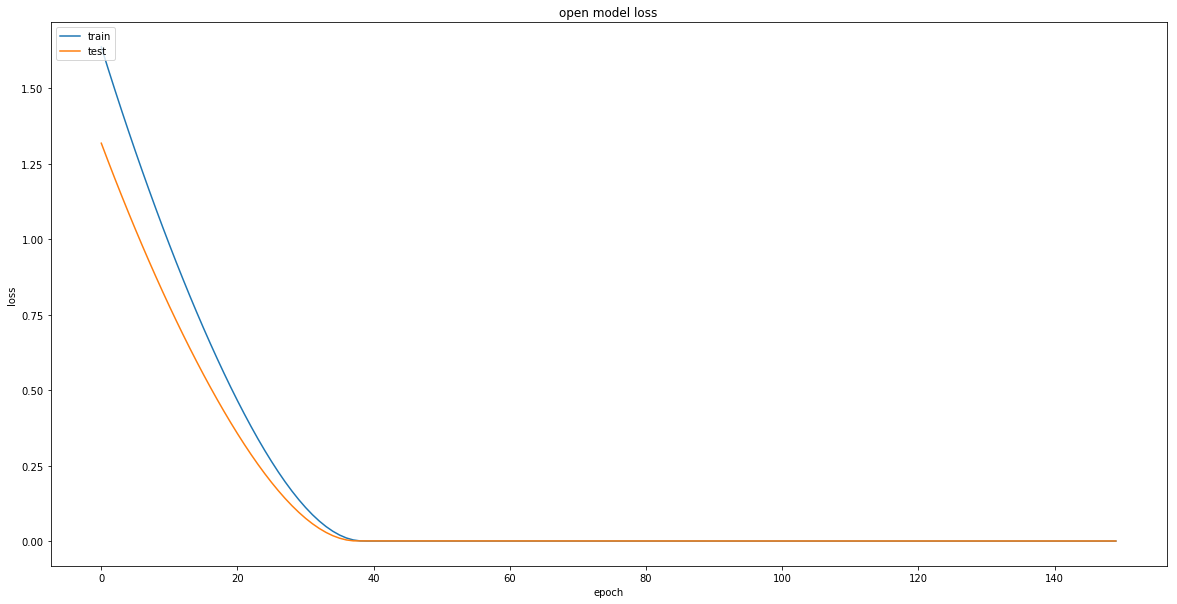

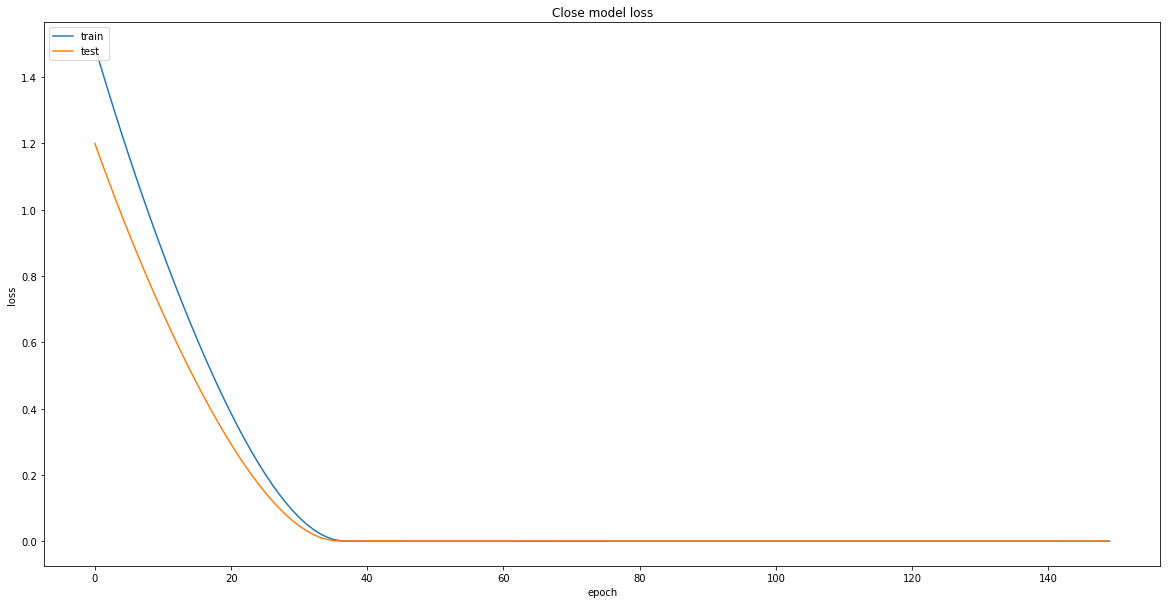

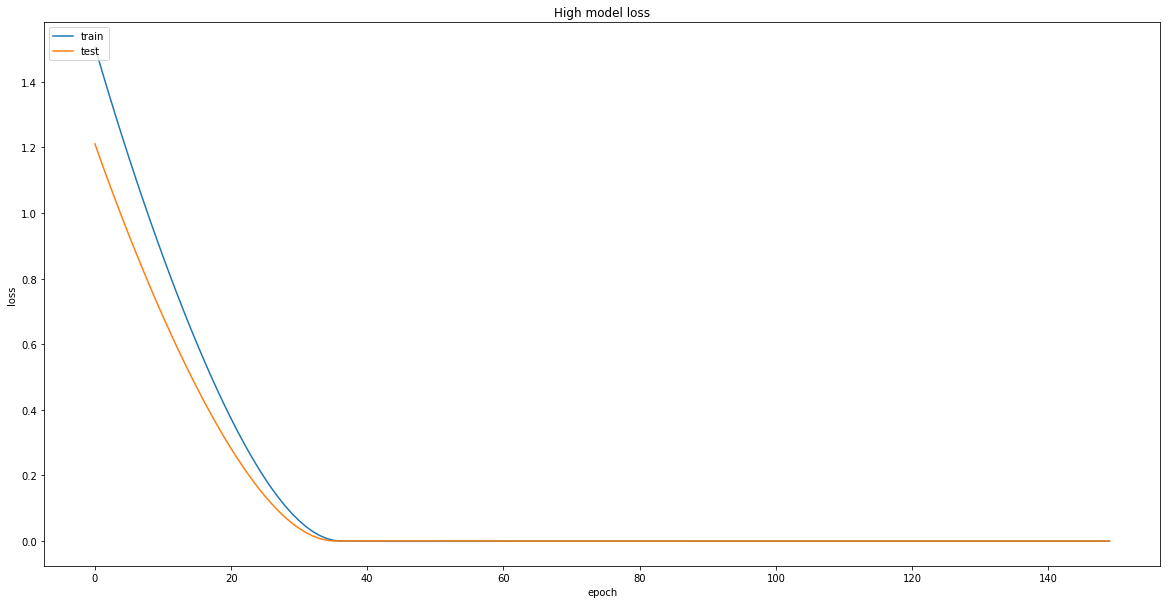

In [7]:
plt.figure(figsize=(20,10))
plt.plot(open_history.history['loss'])
plt.plot(open_history.history['val_loss'])
plt.title('open model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(close_history.history['loss'])
plt.plot(close_history.history['val_loss'])
plt.title('Close model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(high_history.history['loss'])
plt.plot(high_history.history['val_loss'])
plt.title('High model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(low_history.history['loss'])
plt.plot(low_history.history['val_loss'])
plt.title('Low model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
#2018.09.26 22:17:11.238	oneCandle EURUSDmicro,H4: 1.17398000,1.17570000,1.17252000,1.17510000



#n = np.array([1.17398000,1.17570000,1.17252000,1.17510000])
#n = n.reshape((1, 1, 4))
openVal = openm.predict(candletest)
closeVal = closem.predict(candletest)
highVal = highm.predict(candletest)
lowVal = lowm.predict(candletest)
print('Open Value',openVal.shape)
print('Low Value',lowVal.shape)
print('High Value',highVal.shape)
print('Close Value',closeVal.shape)

Open Value (4031, 1)
Low Value (4031, 1)
High Value (4031, 1)
Close Value (4031, 1)


In [9]:
modelFolder = 'Models\\'
openm.save(modelFolder+'open_model.h5')
closem.save(modelFolder+'close_model.h5')
highm.save(modelFolder+'high_model.h5')
lowm.save(modelFolder+'low_model.h5')

In [10]:
print(candletest.shape)
candtt = candletest.reshape(candletest.shape[0],4)
print(candletest.shape)
actualOpen = candtt[:,0]
actualHigh = candtt[:,1]
actualLow = candtt[:,2]
actualClose = candtt[:,3]
print('Open Value',actualOpen.shape)
print('Low Value',actualLow.shape)
print('High Value',actualHigh.shape)
print('Close Value',actualClose.shape)


(4031, 1, 4)
(4031, 1, 4)
Open Value (4031,)
Low Value (4031,)
High Value (4031,)
Close Value (4031,)


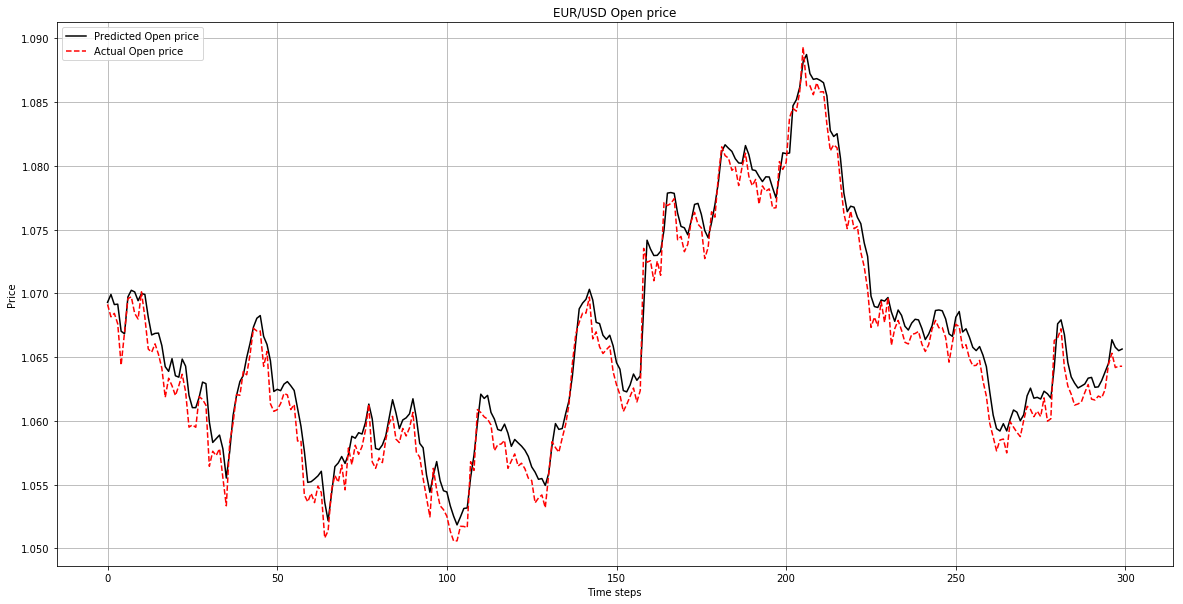

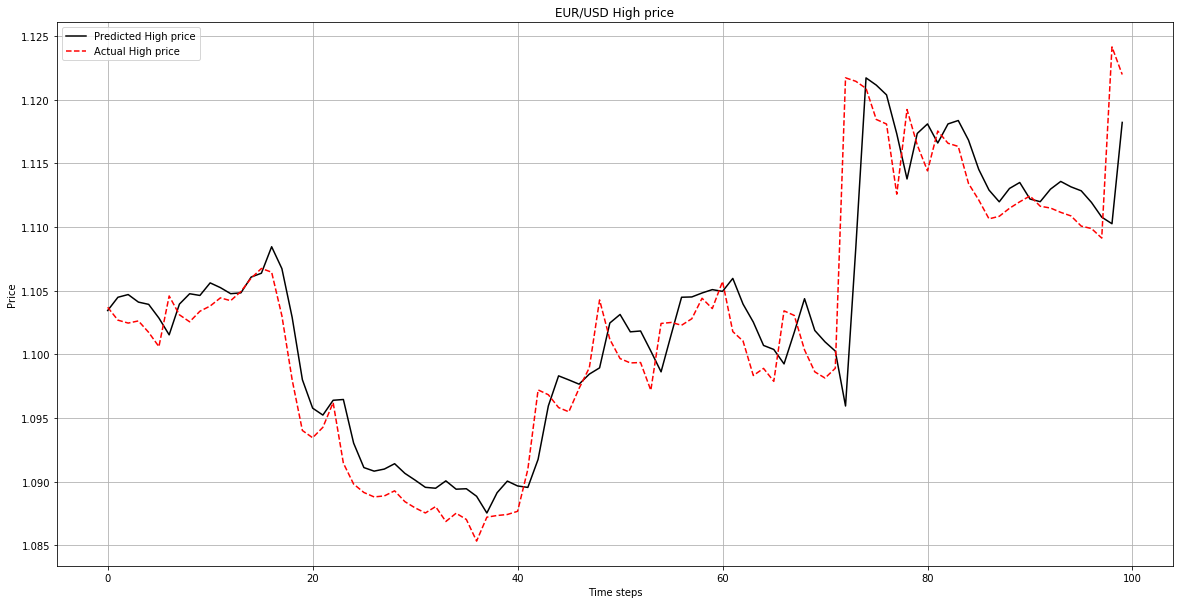

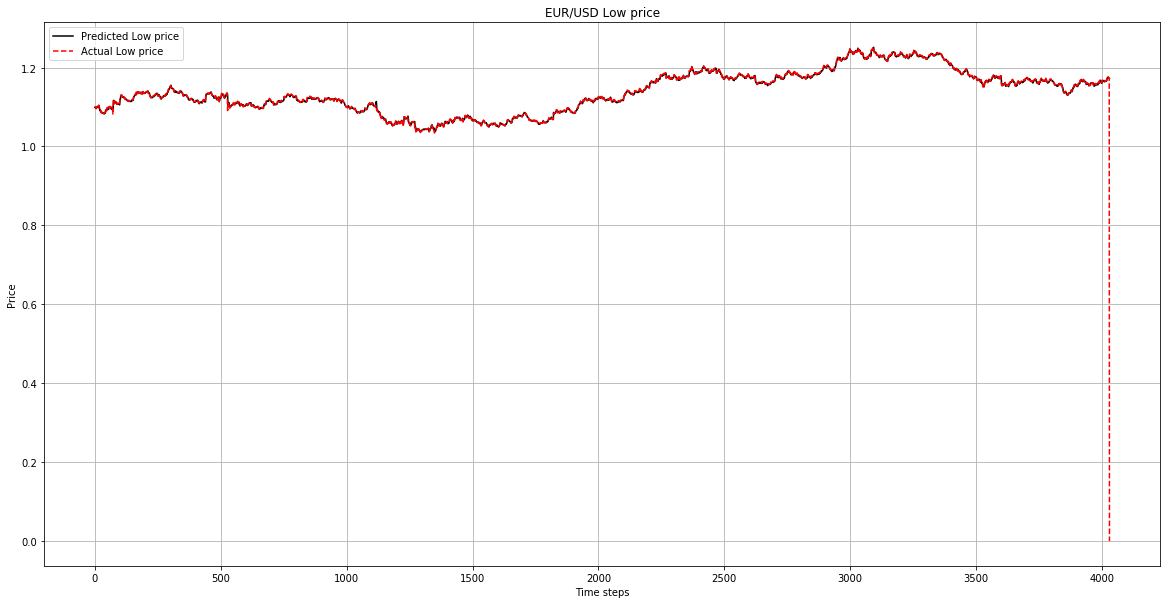

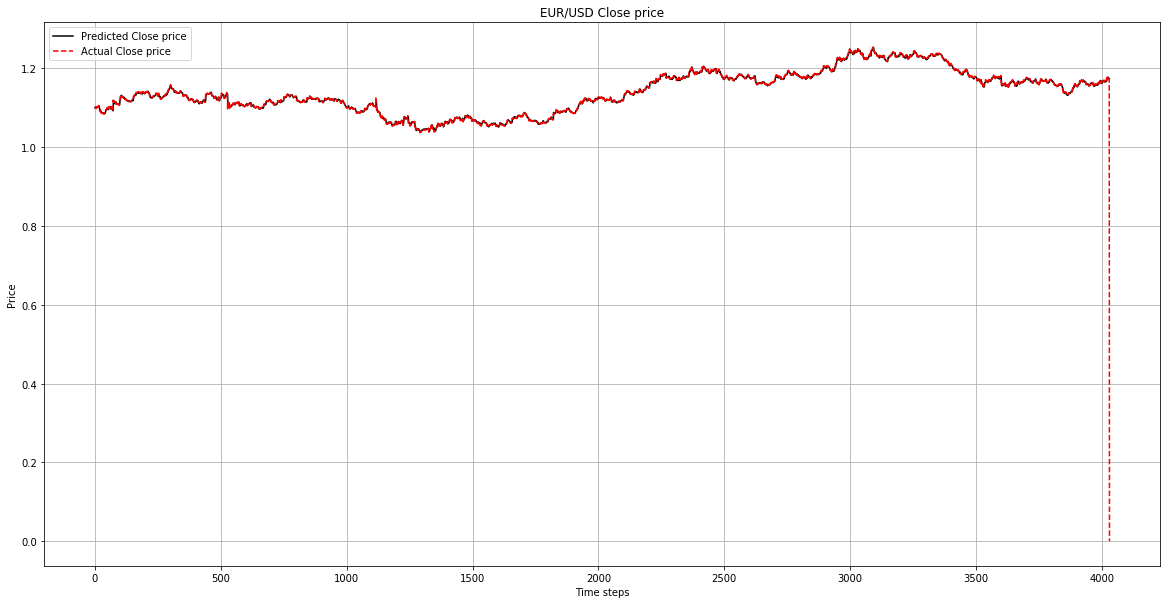

In [11]:
plt.figure(figsize=(20,10))
plt.plot(range(300), openVal[1500:1800],'k-', label = 'Predicted Open price');
plt.plot(range(300),yopentest[1500:1800],'r--', label = 'Actual Open price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD Open price')
plt.grid(True)
plt.legend(loc = 'upper left')
            
plt.figure(figsize=(20,10))
plt.plot(range(100), highVal[:100],'k-', label = 'Predicted High price');
plt.plot(range(100),yhightest[:100],'r--', label = 'Actual High price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD High price')
plt.grid(True)
plt.legend(loc = 'upper left')
            
plt.figure(figsize=(20,10))
plt.plot(range(actualOpen.shape[0]), lowVal,'k-', label = 'Predicted Low price');
plt.plot(range(actualOpen.shape[0]),ylowtest,'r--', label = 'Actual Low price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD Low price')
plt.grid(True)
plt.legend(loc = 'upper left')
            
plt.figure(figsize=(20,10))
plt.plot(range(actualOpen.shape[0]), closeVal,'k-', label = 'Predicted Close price');
plt.plot(range(actualOpen.shape[0]),yclosetest,'r--', label = 'Actual Close price')
plt.xlabel('Time steps')
plt.ylabel('Price')
plt.title('EUR/USD Close price')
plt.grid(True)
plt.legend(loc = 'upper left')




In [12]:
openV = openVal.reshape(openVal.shape[0])
closeV = closeVal.reshape(closeVal.shape[0])
highV = highVal.reshape(highVal.shape[0])
lowV = lowVal.reshape(lowVal.shape[0])
openV.shape

(4031,)

In [47]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
#openV = [n[0][0][0],openVal[0][0]]
#closeV = [n[0][0][3],closeVal[0][0]]
#highV = [n[0][0][1],highVal[0][0]]
#lowV = [n[0][0][2],lowVal[0][0]]
 

trace = go.Candlestick(open=openV[[6, 7, 8, 1000, 1500]],
                       high=highV[[6, 7, 8, 1000, 1500]],
                       low=lowV[[6, 7, 8, 1000, 1500]],
                       close=closeV[[6, 7, 8, 1000, 1500]])
dt = [trace]
offline.iplot(dt, filename='simple_candlestick',image = 'png')



In [36]:
openVal[0]


array([1.1005528], dtype=float32)

In [19]:
fn = 'data\open_LSTM.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in openVal:
    x_arrstr = np.char.mod('%f', line)
    x_str = ",".join(x_arrstr) + "\n"
    text_file.write(x_str)      
text_file.close()



fn = 'data\high_LSTM.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in highVal:
    x_arrstr = np.char.mod('%f', line)
    x_str = ",".join(x_arrstr) + "\n"
    text_file.write(x_str)      
text_file.close()


fn = 'data\low_LSTM.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in lowVal:
    x_arrstr = np.char.mod('%f', line)
    x_str = ",".join(x_arrstr) + "\n"
    text_file.write(x_str)      
text_file.close()


fn = 'data\close_LSTM.txt'
text_file = open(fn, 'w')
#dataset = []   
for line in closeVal:
    x_arrstr = np.char.mod('%f', line)
    x_str = ",".join(x_arrstr) + "\n"
    text_file.write(x_str)      
text_file.close()